In [1]:
import pandas as pd
import numpy as np
from scipy import optimize
import math
import scipy
from matplotlib import pylab as plt

# 1. Исследование зависимости емкости детектора от напряжения смещения Uсм на его электродах

In [2]:
x = np.array([0,   0.69, 1.1, 1.39,1.61,1.79,1.95,2.3,2.48,2.71, 2.89,3.0,3.22,3.4,3.56,3.69,3.81,3.91,4.01])
y = np.array([5.50,5.20,  5.13,5.08,5.05,4.96,4.89,4.74,4.67,4.58,4.51,4.47,4.49,4.33,4.28,4.23,4.19,4.16,4.13])


In [3]:
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y)[0]
print('y = %s*x + %s  '%(m,c))

y = -0.3459467363414747*x + 5.527680497030708  


/usr/local/bin/start_ipykernel.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


In [4]:
x1 = np.arange(0,5,1)

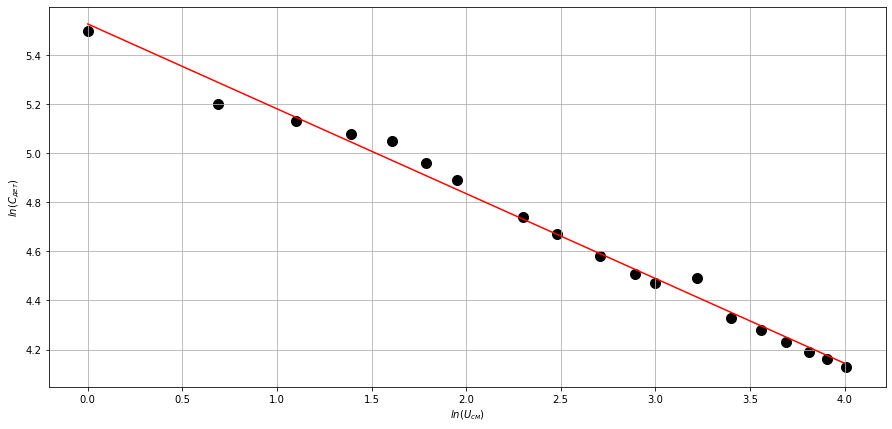

In [5]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 7

#plt.rcParams["figure.figsize"] = fig_size
plt.title('')

#plt.plot(E, N, color='black' )
plt.ylabel('$ln(C_{дет})$')
plt.xlabel('$ln(U_{см})$')
plt.rcParams.update({'font.size': 12})  #размер шрифта
plt.grid()

plt.scatter(x, y, color='black', s=100, marker='o', )
plt.plot(x1,m*x1+c, 'r', label='Fitted line')


In [6]:
def averageK(x,y):
    sumK = 0 
    l = 0
    sumk = 0
    klist = []
    for i in range(len(y)-1):
        k = (y[i]-y[i+1])/(x[i]-x[i+1])
        klist.append(k)
        sumK+=k
        l +=1
    diviation = 0 
    num = sumK/l
    for i in range(len(klist)):
        diviation+= (klist[i] - num)**2

    diviation = (diviation/len(klist))**(0.5)
    print(diviation)
    print(num)
    

In [7]:
averageK(x,y)

0.19006478915211958
-0.3467505655122216


In [8]:
def fincFORd(x):
    listD = []
    E0 = 1.0/(4.0*math.pi*9.0*10**9)
    print('значение ln(C) |   зачение d')
    for i in x:
        print('%s         |'%i, '%s'%(12.0*(E0*100.0*10**(12)/math.exp(i))))
        listD.append((12.0*(E0*100.0*10**(12)/math.exp(i))))
    return listD

In [9]:
listD = fincFORd(y)

значение ln(C) |   зачение d
5.5         | 43.36199171455545
5.2         | 58.53256642993034
5.13         | 62.77665636590622
5.08         | 65.99528436460712
5.05         | 68.00513999306106
4.96         | 74.40947534018014
4.89         | 79.80477106517709
4.74         | 92.71991575661397
4.67         | 99.44286821417026
4.58         | 108.80782909783136
4.51         | 116.69728689193477
4.47         | 121.45979351614585
4.49         | 119.05472846463856
4.33         | 139.71201809623147
4.28         | 146.87520644093215
4.23         | 154.40565930561357
4.19         | 160.7070738015618
4.16         | 165.60133283722183
4.13         | 170.64464425086072


In [10]:
def fincFORp(dlist,Ulist, num):
    E0 = 1.0/(4.0*math.pi*9.0*10**9)
   # print(E0)
    k = E0*12*0.135
   
    num-=1 
    print('Плостность кремния вычесленая с помощью d = %s мкМ и Uсм = %s В'%(dlist[num] ,round(math.exp(Ulist[num]))))
    p = ((10**(-6)*dlist[num])**2)/(10*2*k*(0.6+round(math.exp(Ulist[num]))))
    print(' p = %s Ом*См'%p)

In [11]:
for i in range(len(listD)):
    fincFORp(listD,x, i+1)

Плостность кремния вычесленая с помощью d = 43.36199171455545 мкМ и Uсм = 1 В
 p = 4.102096047545385 Ом*См
Плостность кремния вычесленая с помощью d = 58.53256642993034 мкМ и Uсм = 2 В
 p = 4.599696202609258 Ом*См
Плостность кремния вычесленая с помощью d = 62.77665636590622 мкМ и Uсм = 3 В
 p = 3.821212795518819 Ом*См
Плостность кремния вычесленая с помощью d = 65.99528436460712 мкМ и Uсм = 4 В
 p = 3.305029502649868 Ом*См
Плостность кремния вычесленая с помощью d = 68.00513999306106 мкМ и Uсм = 5 В
 p = 2.882722343087789 Ом*См
Плостность кремния вычесленая с помощью d = 74.40947534018014 мкМ и Uсм = 6 В
 p = 2.9283292964154204 Ом*См
Плостность кремния вычесленая с помощью d = 79.80477106517709 мкМ и Uсм = 7 В
 p = 2.925172508291011 Ом*См
Плостность кремния вычесленая с помощью d = 92.71991575661397 мкМ и Uсм = 10 В
 p = 2.8310500983366147 Ом*См
Плостность кремния вычесленая с помощью d = 99.44286821417026 мкМ и Uсм = 12 В
 p = 2.739580727341995 Ом*См
Плостность кремния вычесленая с п

# 2. Выбор оптимального напряжения детектора

In [12]:
def Printer(filepath):
    data0=pd.read_csv(filepath, delimiter='        ', names=['channel','value'])
    y=np.array(data0['value'])
    x=np.array(data0['channel'])
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 15
    fig_size[1] = 7
    plt.rcParams["figure.figsize"] = fig_size
    plt.title('')
    plt.plot(x, y, color='black' )
    plt.xlabel('Номер канала N')
    plt.ylabel('Количество импульсов n')
    plt.rcParams.update({'font.size': 12})  #размер шрифта

/usr/local/bin/start_ipykernel.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


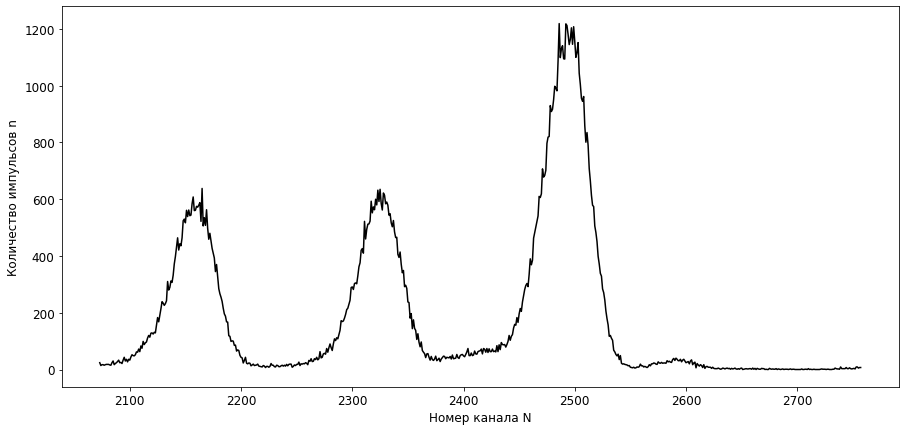

In [13]:
Printer('2_u_55v.txt')

In [14]:
('2_u_55v.txt')

'2_u_55v.txt'

In [15]:
def ffff(path_file,a,b):
    my_df =  pd.read_csv(path_file, delimiter='        ', names=['channel','value'])
    my_df = my_df[my_df['channel']>a]
    my_df = my_df[my_df['channel'] < b]
    y=np.array(my_df['value'])
    x=np.array(my_df['channel'])
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 15
    fig_size[1] = 7
    plt.rcParams["figure.figsize"] = fig_size
    plt.title('')
    plt.plot(x, y, color='black' )
    plt.xlabel('Номер канала N')
    plt.ylabel('Количество импульсов n')
    plt.rcParams.update({'font.size': 12})  #размер шрифта

In [16]:
def nearest(lst, target):
    return min(lst, key=lambda x: abs(x-target))

In [17]:
def getXY(file,a,b):
    my_df =  pd.read_csv(file, delimiter='        ', names=['channel','value'])
    my_df = my_df[my_df['channel']> a]
    my_df = my_df[my_df['channel']< b]
    y=np.array(my_df['value'])
    x=np.array(my_df['channel'])
    return x, y

In [18]:
def funcFOR_found_for_calculation(file_path, a, b,c,d,g,p):
    x , y = getXY(file_path,a,b)
    sumN = 0
    for i in range(len(x)):
        sumN+=x[i]
    Nmax = round(sumN/len(x))
    print('Nmax = %s'%int(Nmax))
    
    x0 , y0 = getXY(file_path,g,p)
    sumN0 = 0
    for i in range(len(x0)):
        sumN0+=x0[i]
    Nmax0 = round(sumN0/len(x0))
    print('Nmax0 = %s'%int(Nmax0))
    
    div0 = 0
    for i in range(len(x0)):
        div0+=(Nmax0-x0[i])**2
    div0 = (div0/len(x0))**(0.5)
    print('Sigma N0 = %s'%div0)
    print('N0/Nmax0 = %s proc'%(div0/Nmax0*100))
    
    
    div = 0
    for i in range(len(x)):
        div+=(Nmax-x[i])**2
    div = (div/len(x))**(0.5)
    print('Sigma N = %s'%div)
    print('N/Nmax = %s proc'%(div/Nmax*100))
    
    k = 0
    for i in range(len(x)):
        if int(Nmax) == x[i]:
            k = i
    print('Max Hight = %s'%y[k])
    print('Max Hight / 2  = %s'%(int(y[k]/2)))
    
    div_a = ((div/Nmax)**2+(div0/Nmax0)**2)**(0.5)
    
    x21,y11 = getXY(file_path,c ,Nmax)
    q1 = nearest(y11, int(y[k]/2)) 
    l1 = 0 
    for i in range(len(y11)):
        if q1 == y11[i]:
            l1 =x21[i]
            break
    
    
    x22,y12 = getXY(file_path,Nmax,d)
    q2 = nearest(y12, int(y[k]/2)) 
    
    d1 = (q1)**(0.5)/q1
    d2 = (q2)**(0.5)/q2
    d3 = (d1**2 + d2**2)**(0.5)
    
    
    l2 = 0 
    for i in range(len(y12)):
        if q2 == y12[i]:
            l2 =x22[i]
            break
    print("delta N = %s - %s + 1 = %s"%(l2,l1,l2-l1+1))
    print("delta N = %s  +- %s   d(delta N) = %s proc"%(l2-l1+1, (l2-l1+1)*d3 , d3*100))
    a = (5.15-4.8)/(Nmax0-Nmax)
    print ("a = (5.15 - 4.8)/(N2max - N1max) = %s МэВ/Каннал"%(a))

    print("a = (%s +- %s)*10^(-3)  d(a) = %s proc"%(a*1000,a*div_a*1000,div_a*100))
    print("delta  Eп = a*deltaN = %s "%(a*(l2-l1+1)))
    div_E = (div_a**2 + d3**2)**(0.5)
    print("delta  Eп = %s +- %s d(delta  Eп)= %s proc"%(a*(l2-l1+1),a*(l2-l1+1)*div_E,div_E*100))
    return a*(l2-l1+1), a*(l2-l1+1)*div_E

/usr/local/bin/start_ipykernel.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


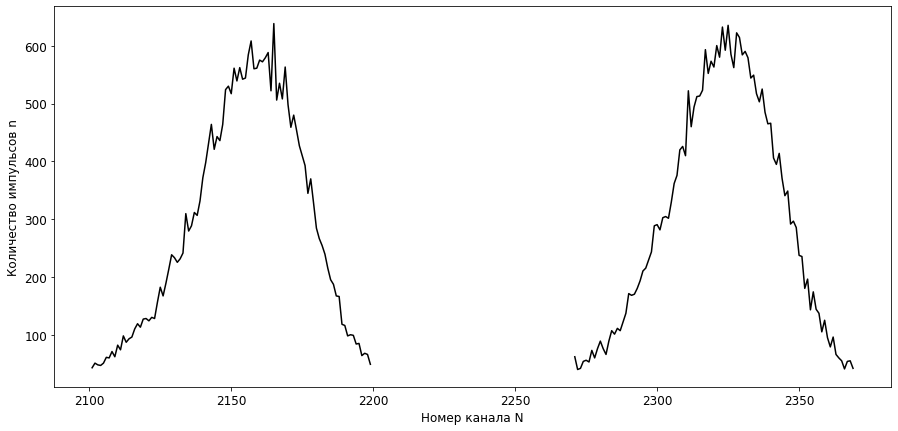

In [19]:
ffff('2_u_55v.txt',2100,2200)
ffff('2_u_55v.txt',2270,2370)

In [20]:
Ep55, dEp55 = funcFOR_found_for_calculation('2_u_55v.txt',2155,2165, 2100,2220,2320,2330)

Nmax = 2160
Nmax0 = 2325
Sigma N0 = 2.581988897471611
N0/Nmax0 = 0.11105328591275747 proc
Sigma N = 2.581988897471611
N/Nmax = 0.1195365230310931 proc
Max Hight = 575
Max Hight / 2  = 287
delta N = 2180 - 2136 + 1 = 45
delta N = 45  +- 3.756618635571044   d(delta N) = 8.348041412380097 proc
a = (5.15 - 4.8)/(N2max - N1max) = 0.0021212121212121245 МэВ/Каннал
a = (2.1212121212121247 +- 0.0034610104575434363)*10^(-3)  d(a) = 0.1631619215699046 proc
delta  Eп = a*deltaN = 0.0954545454545456 
delta  Eп = 0.0954545454545456 +- 0.007970106856719023 d(delta  Eп)= 8.349635754658012 proc


/usr/local/bin/start_ipykernel.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


/usr/local/bin/start_ipykernel.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


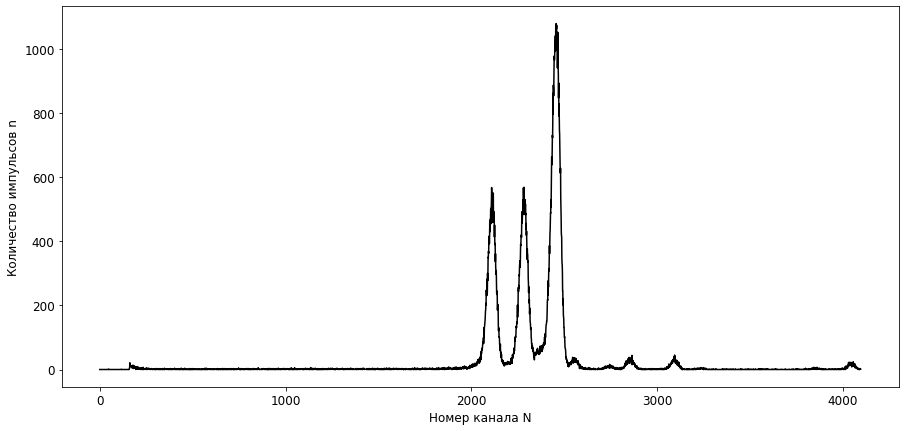

In [21]:
Printer('2_u_30v.txt')

/usr/local/bin/start_ipykernel.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


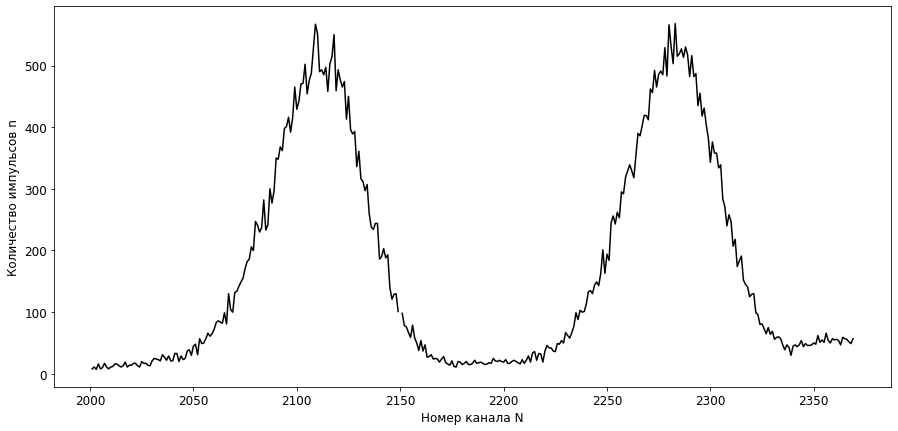

In [22]:
ffff('2_u_30v.txt',2000,2150)
ffff('2_u_30v.txt',2150,2370)

In [23]:
Ep30, dEp30 = funcFOR_found_for_calculation('2_u_30v.txt',2100,2120, 2050,2150,2240,2245)

Nmax = 2110
Nmax0 = 2242
Sigma N0 = 1.224744871391589
N0/Nmax0 = 0.05462733592290763 proc
Sigma N = 5.477225575051661
N/Nmax = 0.25958415047638206 proc
Max Hight = 552
Max Hight / 2  = 276
delta N = 2135 - 2088 + 1 = 48
delta N = 48  +- 4.144783226204282   d(delta N) = 8.634965054592255 proc
a = (5.15 - 4.8)/(N2max - N1max) = 0.0026515151515151556 МэВ/Каннал
a = (2.6515151515151554 +- 0.00703366944999311)*10^(-3)  d(a) = 0.2652698192568826 proc
delta  Eп = a*deltaN = 0.12727272727272748 
delta  Eп = 0.12727272727272748 +- 0.010995140157076122 d(delta  Eп)= 8.63903869484551 proc


/usr/local/bin/start_ipykernel.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


/usr/local/bin/start_ipykernel.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


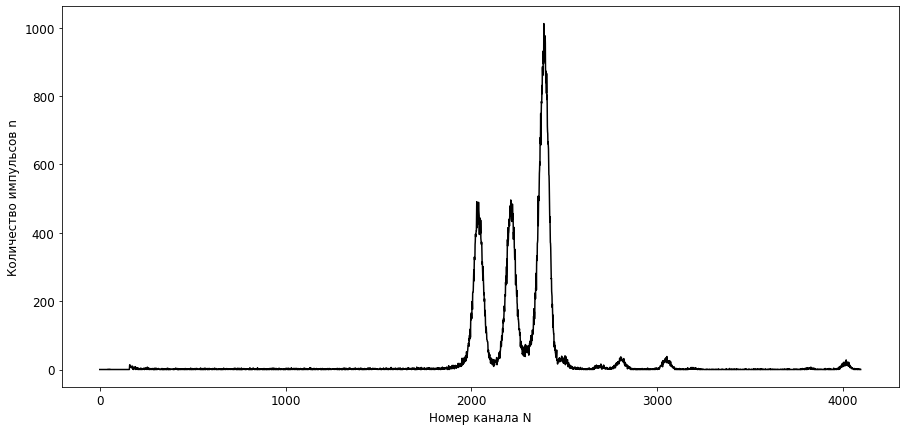

In [24]:
Printer('2_u_15v.txt')

/usr/local/bin/start_ipykernel.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


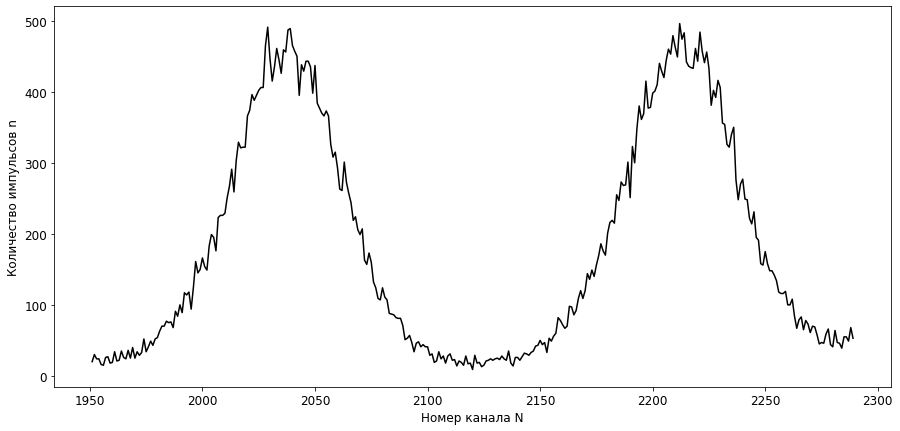

In [25]:
ffff('2_u_15v.txt',1950,2290)

In [26]:
Ep15, dEp15 = funcFOR_found_for_calculation('2_u_15v.txt',2030,2050, 1950,2100, 2205,2210)

Nmax = 2040
Nmax0 = 2208
Sigma N0 = 1.224744871391589
N0/Nmax0 = 0.05546851772606834 proc
Sigma N = 5.477225575051661
N/Nmax = 0.2684914497574344 proc
Max Hight = 465
Max Hight / 2  = 232
delta N = 2068 - 2010 + 1 = 59
delta N = 59  +- 5.54446137454974   d(delta N) = 9.397392160253796 proc
a = (5.15 - 4.8)/(N2max - N1max) = 0.0020833333333333363 МэВ/Каннал
a = (2.083333333333336 +- 0.0057116936221056356)*10^(-3)  d(a) = 0.27416129386107013 proc
delta  Eп = a*deltaN = 0.12291666666666684 
delta  Eп = 0.12291666666666684 +- 0.011555875855286108 d(delta  Eп)= 9.401390526334447 proc


/usr/local/bin/start_ipykernel.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


/usr/local/bin/start_ipykernel.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


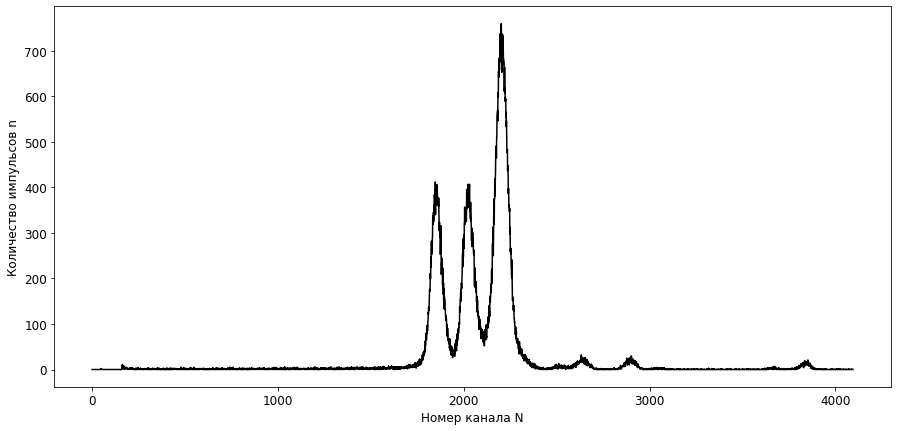

In [27]:
Printer('2_u_5v.txt')

/usr/local/bin/start_ipykernel.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


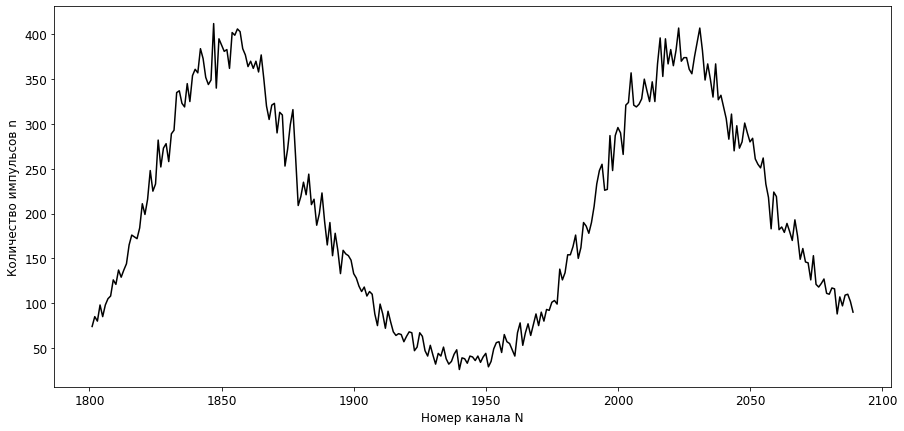

In [28]:
ffff('2_u_5v.txt',1800,2090)

In [29]:
Ep5, dEp5 = funcFOR_found_for_calculation('2_u_5v.txt',1840,1860, 1800,1900, 2020,2030)

Nmax = 1850
Nmax0 = 2025
Sigma N0 = 2.581988897471611
N0/Nmax0 = 0.12750562456649933 proc
Sigma N = 5.477225575051661
N/Nmax = 0.2960662473000898 proc
Max Hight = 388
Max Hight / 2  = 194
delta N = 1889 - 1821 + 1 = 69
delta N = 69  +- 6.989372266967794   d(delta N) = 10.129525024591006 proc
a = (5.15 - 4.8)/(N2max - N1max) = 0.002000000000000003 МэВ/Каннал
a = (2.000000000000003 +- 0.006447104996398037)*10^(-3)  d(a) = 0.3223552498199013 proc
delta  Eп = a*deltaN = 0.1380000000000002 
delta  Eп = 0.1380000000000002 +- 0.013985821051525366 d(delta  Eп)= 10.134652935887932 proc


/usr/local/bin/start_ipykernel.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


/usr/local/bin/start_ipykernel.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


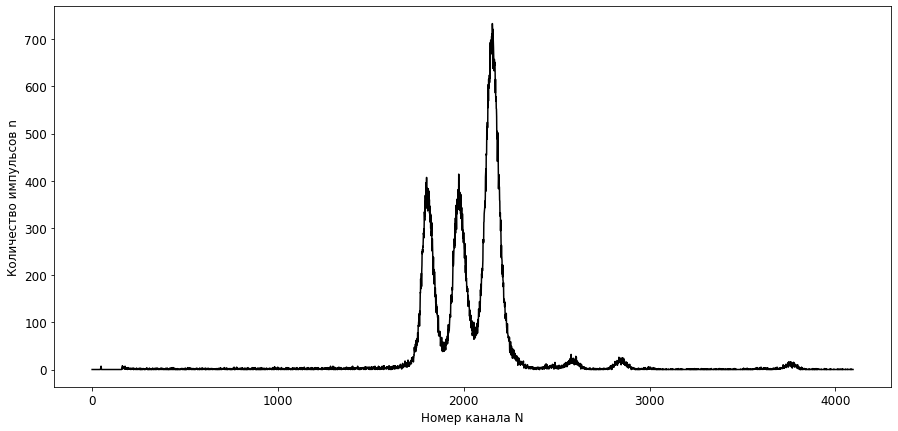

In [30]:
Printer('2_u_4v.txt')

/usr/local/bin/start_ipykernel.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


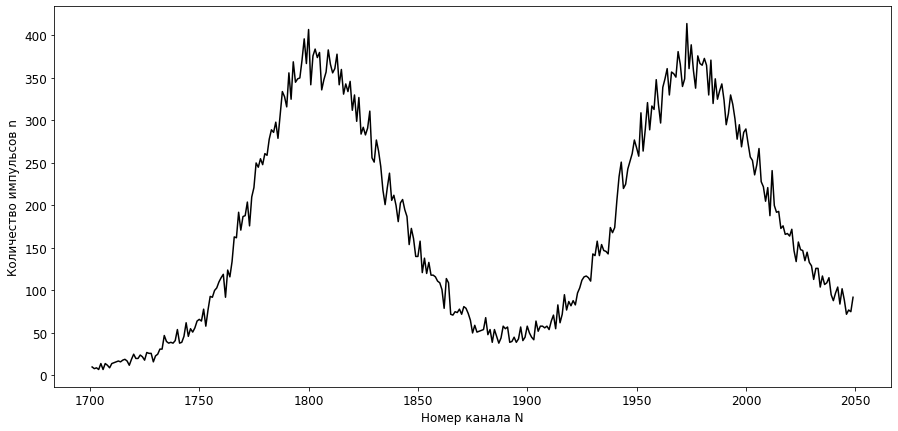

In [31]:
ffff('2_u_4v.txt',1700,2050)

In [32]:
Ep4, dEp4 = funcFOR_found_for_calculation('2_u_4v.txt',1800,1810, 1750,1870, 1970,1980)

Nmax = 1805
Nmax0 = 1975
Sigma N0 = 2.581988897471611
N0/Nmax0 = 0.13073361506185371 proc
Sigma N = 2.581988897471611
N/Nmax = 0.1430464763142167 proc
Max Hight = 380
Max Hight / 2  = 190
delta N = 1845 - 1768 + 1 = 78
delta N = 78  +- 8.013879170432306   d(delta N) = 10.274204064656802 proc
a = (5.15 - 4.8)/(N2max - N1max) = 0.002058823529411768 МэВ/Каннал
a = (2.058823529411768 +- 0.00398974144317502)*10^(-3)  d(a) = 0.1937874415256435 proc
delta  Eп = a*deltaN = 0.1605882352941179 
delta  Eп = 0.1605882352941179 +- 0.016502097592993318 d(delta  Eп)= 10.276031468164321 proc


/usr/local/bin/start_ipykernel.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


/usr/local/bin/start_ipykernel.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


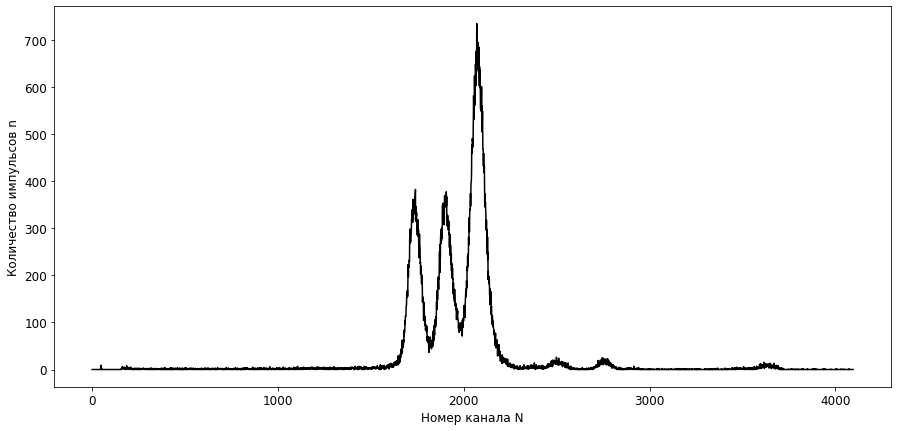

In [33]:
Printer('2_u_3v.txt')

/usr/local/bin/start_ipykernel.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


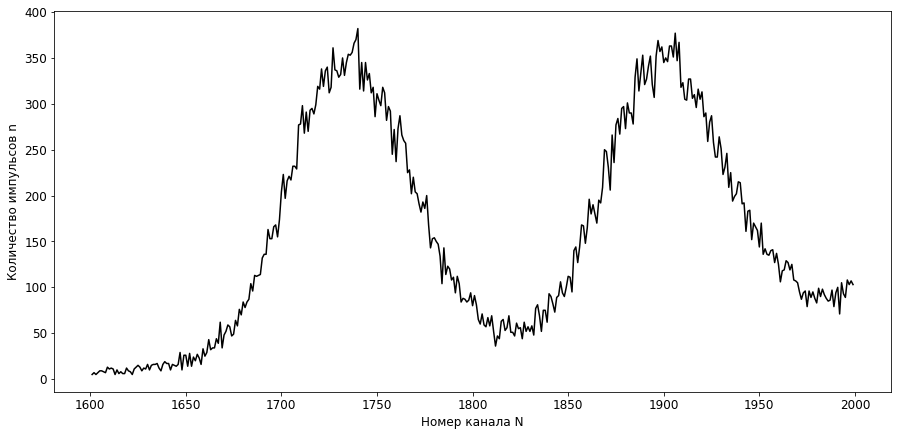

In [34]:
ffff('2_u_3v.txt',1600,2000)

In [35]:
Ep3, dEp3 = funcFOR_found_for_calculation('2_u_3v.txt',1725,1735, 1650,1800, 1890,1910)

Nmax = 1730
Nmax0 = 1900
Sigma N0 = 5.477225575051661
N0/Nmax0 = 0.2882750302658769 proc
Sigma N = 2.581988897471611
N/Nmax = 0.14924791314864805 proc
Max Hight = 329
Max Hight / 2  = 164
delta N = 1777 - 1693 + 1 = 85
delta N = 85  +- 9.345111329202318   d(delta N) = 10.99424862259096 proc
a = (5.15 - 4.8)/(N2max - N1max) = 0.002058823529411768 МэВ/Каннал
a = (2.058823529411768 +- 0.006683330370758026)*10^(-3)  d(a) = 0.3246189037225322 proc
delta  Eп = a*deltaN = 0.17500000000000027 
delta  Eп = 0.17500000000000027 +- 0.019248319943231222 d(delta  Eп)= 10.99903996756068 proc


/usr/local/bin/start_ipykernel.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


/usr/local/bin/start_ipykernel.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


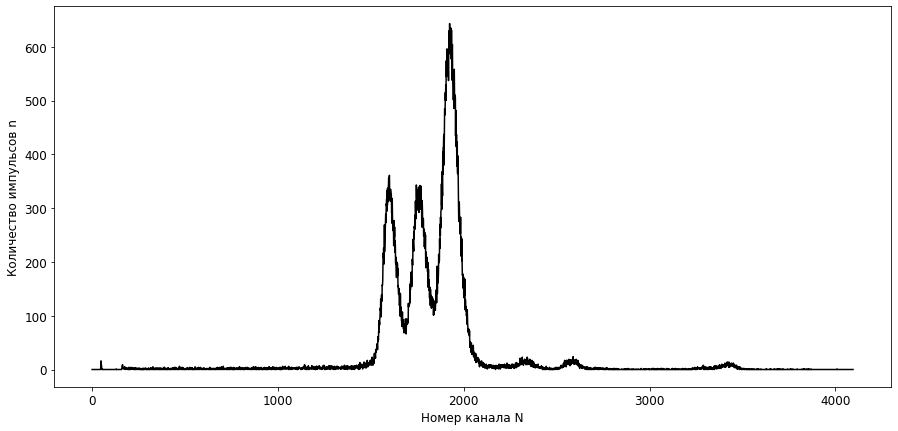

In [36]:
Printer('2_u_2v.txt')

/usr/local/bin/start_ipykernel.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


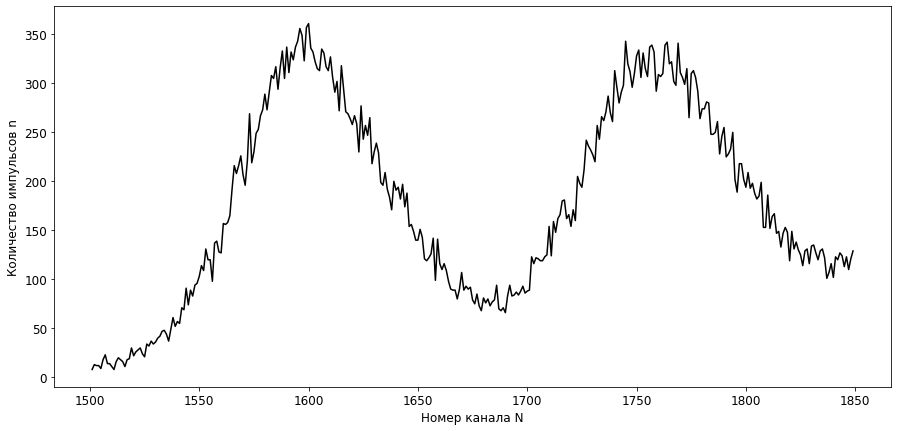

In [37]:
ffff('2_u_2v.txt',1500,1850)

In [38]:
Ep2, dEp2 = funcFOR_found_for_calculation('2_u_2v.txt',1590,1610, 1550,1650, 1700,1850)

Nmax = 1600
Nmax0 = 1775
Sigma N0 = 43.01162633521314
N0/Nmax0 = 2.4231902160683454 proc
Sigma N = 5.477225575051661
N/Nmax = 0.3423265984407288 proc
Max Hight = 361
Max Hight / 2  = 180
delta N = 1642 - 1565 + 1 = 78
delta N = 78  +- 8.069452981991494   d(delta N) = 10.345452541014737 proc
a = (5.15 - 4.8)/(N2max - N1max) = 0.002000000000000003 МэВ/Каннал
a = (2.000000000000003 +- 0.04894502353967919)*10^(-3)  d(a) = 2.4472511769839556 proc
delta  Eп = a*deltaN = 0.15600000000000025 
delta  Eп = 0.15600000000000025 +- 0.01658430611686079 d(delta  Eп)= 10.63096545952613 proc


/usr/local/bin/start_ipykernel.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [39]:
x = np.array([55,30,15,5,4,3,2])
y = np.array([Ep55,Ep30,Ep15,Ep5,Ep4,Ep3,Ep2])
yerr = np.array([dEp55,dEp30,dEp15,dEp5,dEp4,dEp3,dEp2])
xerr = 0
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y)[0]
print('y = %s*x + %s  '%(m,c))
x1 = np.arange(0,60,1)

y = -0.0011932494278803852*x + 0.158751801352346  


/usr/local/bin/start_ipykernel.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  app.launch_new_instance()


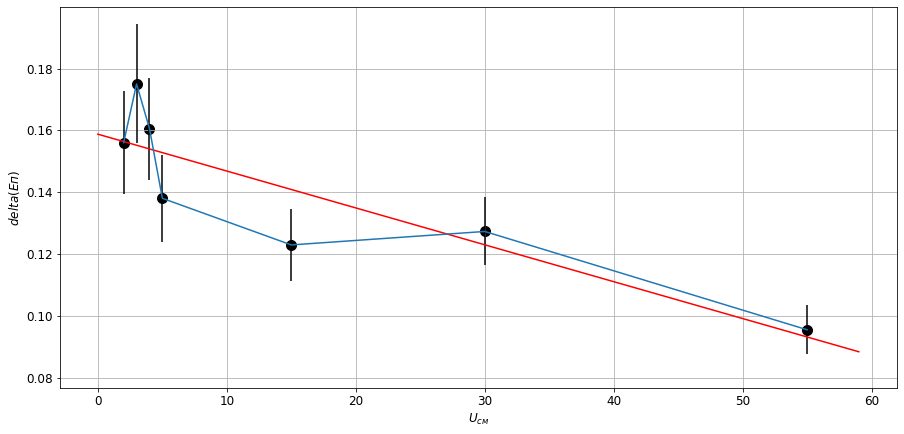

In [40]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 7

#plt.rcParams["figure.figsize"] = fig_size
plt.title('')

#plt.plot(E, N, color='black' )c
plt.ylabel('$delta(Eп)$')
plt.xlabel('$U_{см}$')
plt.rcParams.update({'font.size': 12})  #размер шрифта
plt.grid()

plt.scatter(x, y, color='black', s=100, marker='o', )
plt.errorbar(x, y, xerr=xerr, yerr=yerr, ecolor='black')
plt.plot(x1,m*x1+c, 'r', label='Fitted line')


# 3. Измерение собственного энергетического разрешения ППД

/usr/local/bin/start_ipykernel.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


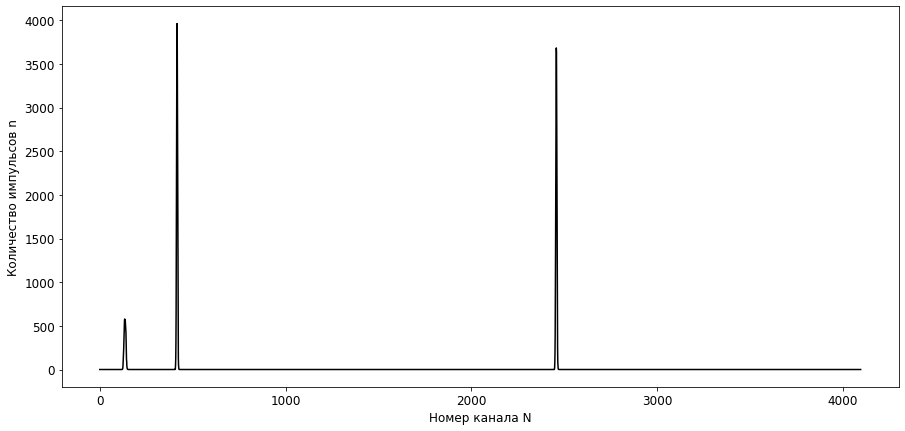

In [41]:
Printer('3_tolko_generator.txt')

/usr/local/bin/start_ipykernel.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


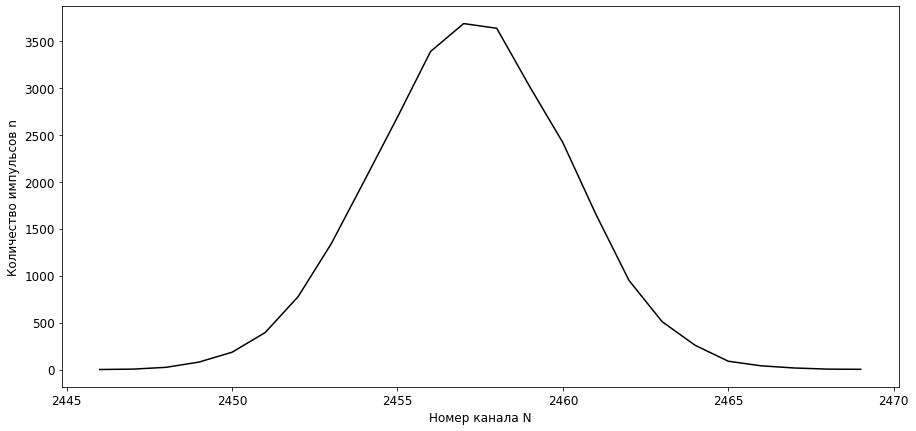

In [54]:
ffff('3_tolko_generator.txt',2445,2470)

In [55]:
maxN = 2457   
Pmax = 3682
half_Pmax = Pmax/2

In [56]:

def calcul_3(file_path,Nmax,a,b,half_Pmax):

    
    x21,y11 = getXY(file_path,a ,Nmax)
    q1 = nearest(y11,half_Pmax) 
    l1 = 0 
    for i in range(len(y11)):
        if q1 == y11[i]:
            l1 =x21[i]
            break
    
    
    x22,y12 = getXY(file_path,Nmax,b)
    q2 = nearest(y12, half_Pmax) 
    
    d1 = (q1)**(0.5)/q1
    d2 = (q2)**(0.5)/q2
    d3 = (d1**2 + d2**2)**(0.5)
    
    
    l2 = 0 
    for i in range(len(y12)):
        if q2 == y12[i]:
            l2 =x22[i]
            break
    a =  0.0021212121212121245 
    div_a =  0.1631619215699046
    div_E = (div_a**2 + d3**2)**(0.5)
    print("delta(N) = %s +- %s "%((l2-l1+1),(l2-l1+1)*d3)) 
    print("delta(E) = %s +- %s"%((l2-l1+1)*a,(l2-l1+1)*a*div_E))
    #return (l2-l1+1)
    return (l2-l1+1)*a, (l2-l1+1)*a*div_E

In [57]:
Esh , dEsh = calcul_3('3_tolko_generator.txt',416,405 ,424,half_Pmax)

delta(N) = 7 +- 0.21146669799361031 
delta(E) = 0.014848484848484871 +- 0.0024638835134002993


/usr/local/bin/start_ipykernel.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


/usr/local/bin/start_ipykernel.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


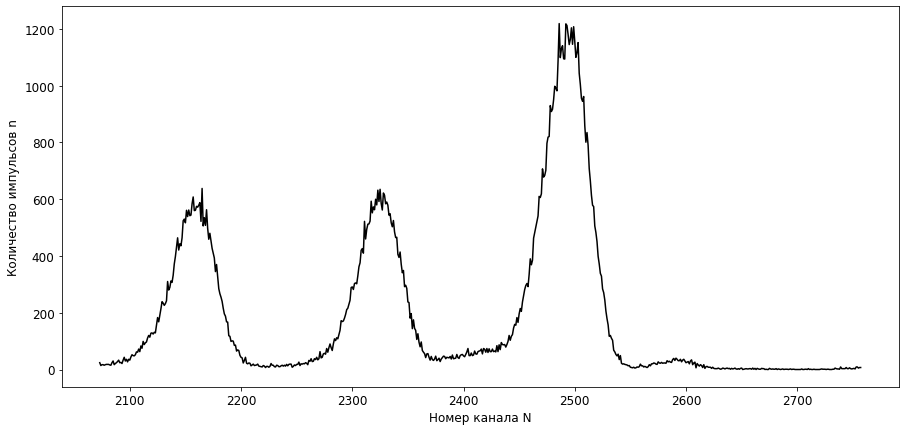

In [45]:
Printer('2_u_55v.txt')

In [46]:
E55, dE55 = calcul_3('2_u_55v.txt',2325,2250,2380 , 635/2)

delta(N) = 46 +- 3.7499712055710384 
delta(E) = 0.09757575757575773 +- 0.0177972148875328


/usr/local/bin/start_ipykernel.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [58]:
Edet = (E55**2 - Esh**2)**(0.5)
div_Edet = ((dE55/E55)**2+ (dEsh/Esh)**2)**(0.5)
print('Едет = %s +- %s'%(Edet,Edet*div_Edet ))

Едет = 0.09643936418386093 +- 0.02378006464770262


/usr/local/bin/start_ipykernel.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


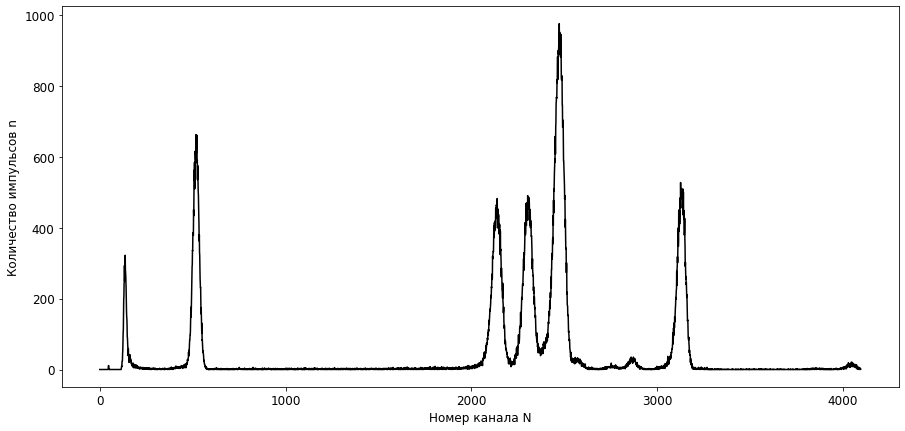

In [49]:
Printer('4_gen_ist.txt')

/usr/local/bin/start_ipykernel.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


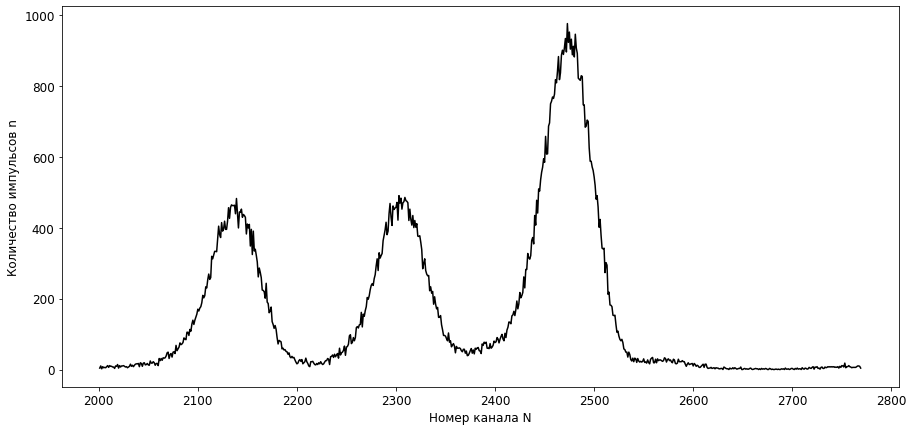

In [60]:
ffff('4_gen_ist.txt',2000,2770)

In [61]:
Edet55, dEdet55 = calcul_3('4_gen_ist.txt',2303,2250,2380 , 490/2)

delta(N) = 60 +- 5.50696620969071 
delta(E) = 0.12727272727272748 +- 0.023826151254495408


/usr/local/bin/start_ipykernel.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


# 4. Измерение энергетического эквивалента уровня шума ППД

In [63]:
Eshdet = (Edet55**2 - Esh**2)**(0.5)
div_Eshdet = ((dEdet55/Edet55)**2+ (dEsh/Esh)**2)**(0.5)
print('Еш.дет = %s +- %s'%(Eshdet,Eshdet*div_Eshdet ))

Еш.дет = 0.12640359807039667 +- 0.03162119791583585


# 5. Проверка пропорциональности детектора

/usr/local/bin/start_ipykernel.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


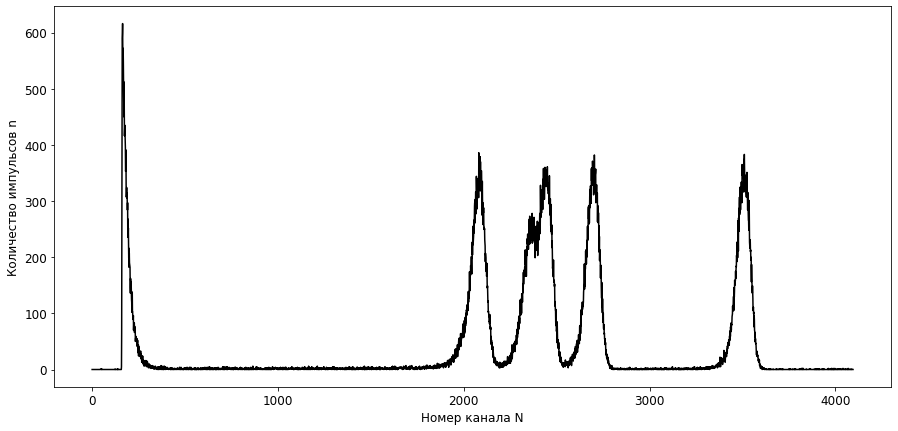

In [64]:
Printer('5_1.txt')


In [69]:
#[3510, 2701,2461,2088]
#[7.687,6.002,5.490, 4.8]


{2088, 2461, 2701, 3510}


/usr/local/bin/start_ipykernel.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


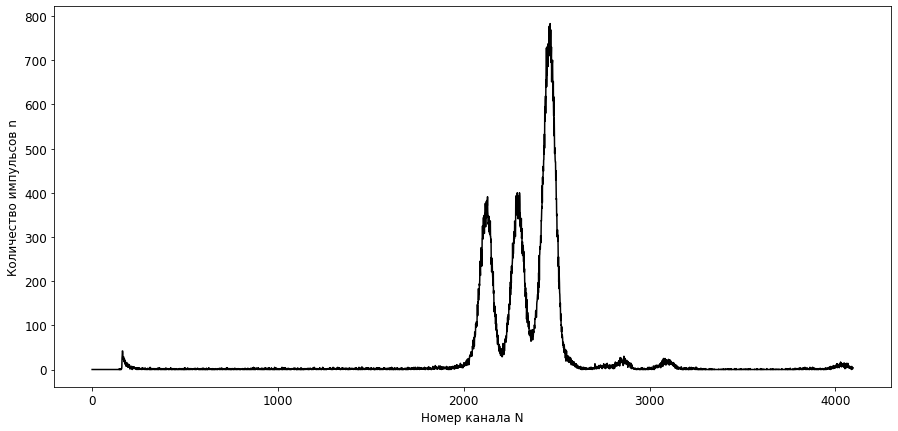

In [65]:
Printer('5_2.txt')

In [71]:
#[2128, 2288,  2463]
#[4.8,5.15,5.5]
#[3510, 2701,2461,2088]
#[7.687,6.002,5.490, 4.8]
x = np.array([7.687, 6.002, 5.5,  5.490,  5.15, 4.8,4.8])
y = np.array([3510,   2701, 2463, 2461,   2288, 2128,  2088])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y)[0]
print('y = %s*x + %s  '%(m,c))

y = 484.63224558117344*x + -209.93783014572514  


/usr/local/bin/start_ipykernel.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [88]:
x1 = np.arange(4.7,7.8,0.1)

In [99]:
xerr= 0
yerr = [ 50,50,50,50,50,50,50]

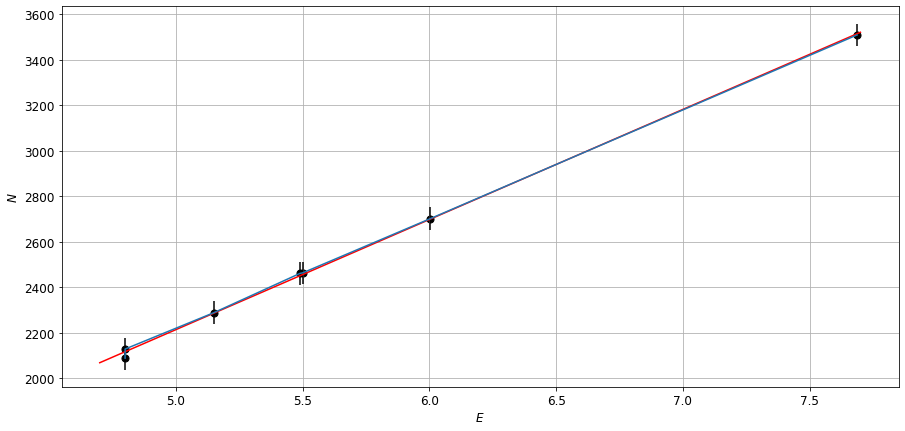

In [100]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 7

#plt.rcParams["figure.figsize"] = fig_size
plt.title('')

#plt.plot(E, N, color='black' )
plt.ylabel('$N$')
plt.xlabel('$E$')
plt.rcParams.update({'font.size': 12})  #размер шрифта
plt.grid()
plt.errorbar(x, y, xerr=xerr, yerr=yerr, ecolor='black')
plt.plot(x1,m*x1+c, 'r', label='Fitted line')
plt.scatter(x, y, color='black', s=50, marker='o', )

